# 1)Problem Statement 

### The aim of this data science project is to build  a predictive model and find out the sales of each product at a particular store.


## Goal

### Using this model ,Bigmart will try to understand the properties of products and store which play key role in increasing sales.

# 2) Hypothesis Generation

#### 1.City Type : stores located in urban should have higher sales
#### 2.Store Location:Store located in popular market place should have higher sales
#### 3.Store Size:Stores with large size should have higher sales
#### 4.Populated City:City with high population should have higher sales.
#### 5.Branded Product:Branded product will have higher sales.
#### 6.Product Frequency: More frequent product will have higher sales.
#### 7.Product Visibility:Products with large space should have higher sales.
#### 8.Promotional Offer:Promo product should have higher sales.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
train_data=pd.read_csv("C:/Users/Hp/OneDrive/Documents/Big mart dataset/Train.csv")
test_data=pd.read_csv("C:/Users/Hp/OneDrive/Documents/Big mart dataset/Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Find rows and column of training dataset
train_data.shape


(8523, 12)

In [6]:
# Find rows and column of testing dataset
test_data.shape

(5681, 11)

# EDA


### We need to predict Item_Outlet_Sale for test data.
### Lets first merge the train and test dataset for EDA

In [7]:
train_data['source']='train'
test_data['source']='test'
#test_data['Item_Outlet_Sales']=np.nan
data=pd.concat([train_data,test_data],ignore_index=True)
print('After Combining Dataset:',data.shape)

After Combining Dataset: (14204, 13)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
# Summary of dataset
data.describe(include=[object,np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


# Data Exploration

## Missing Values Treatment

In [10]:
# Lets check missing values
print('Train:\n')
print('Missing values by count: \n\n',
     data.isnull().sum().sort_values(ascending=False),'\n\n Missing values by % :\n\n',
     data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100)

Train:

Missing values by count: 

 Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64 

 Missing values by % :

 Item_Outlet_Sales            39.995776
Outlet_Size                  28.273726
Item_Weight                  17.171219
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
source        

In [11]:
# Lets check missing values and Imputate them
print('Missing values in Outlet Size: \n\n',data.Outlet_Size.value_counts())
print('\nMissing values in Item Weight: \n\n',data.Item_Weight.value_counts())

Missing values in Outlet Size: 

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing values in Item Weight: 

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


### Outlet size is categorical column,we can use mode to filling the values

In [12]:
data['Outlet_Size']=data.Outlet_Size.fillna(data.Outlet_Size.mode()[0])

In [13]:
# Check if we filled all values
print("Missing values after filling:",data.Outlet_Size.isnull().sum())

Missing values after filling: 0


### Item weight is numerical column,we need to visualize the distribution to see clearly

Text(0.5, 1.0, 'Item weight distribution')

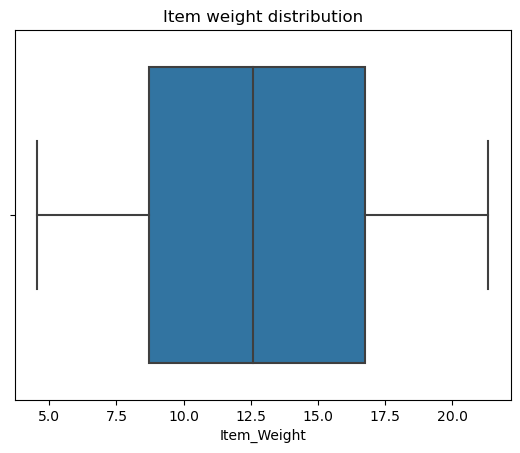

In [14]:
# Plot the boxplot to see outliers
sns.boxplot(x=data['Item_Weight'])
plt.title('Item weight distribution')

#### No outliers in Item Weight so we can replace missing values by mean

In [15]:
# Imputate missing values with its mean
data['Item_Weight']=data.Item_Weight.fillna(data.Item_Weight.mean())

In [16]:
# Check if we filled all values
print("Missing values after filling:",data.Item_Weight.isnull().sum())

Missing values after filling: 0


In [17]:
# Check information for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Variable Identification

In [18]:
# Numericals
num_df=data.select_dtypes('number')

# Categoricals
cat_df=data.select_dtypes('object')

In [19]:
# Lets deal with categorical data first
for col in cat_df.columns:
    if(col!='Item_Identifier'):
        print('\nfrequency of categories for variable %s'%col)
        print('\nTotal Categories: ',len(cat_df[col].value_counts()),'\n',cat_df[col].value_counts())


frequency of categories for variable Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

frequency of categories for variable Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

frequency of categories for variable Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT01

#### Item Fat Content : It contain repeated values ,lets replace them
#### Item Type: We have categories of items,that can be shrink

In [20]:
# Replace repeated values in Item Fat Content
data['Item_Fat_Content']=data.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [21]:
# Combine Item Type and create new category
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].replace(['FD','DR','NC'],['Food','Drinks','Non_Consumable'])
data['Item_Type_Combined'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

## Lets deal with Numerical Data

In [22]:
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Item Visibility : min 0 values makes not sense about this
#### Outlet Establishment Year: Better to address how old store is

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

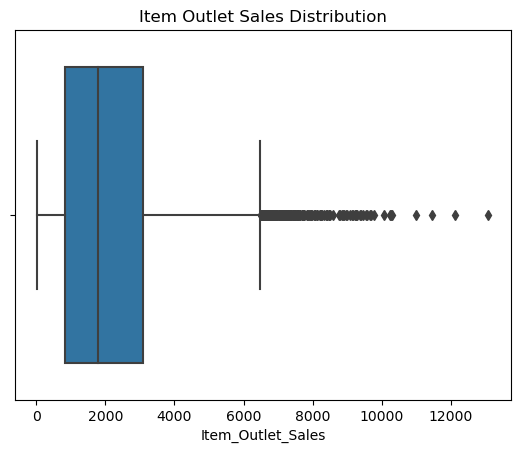

In [23]:
# Plot box plot for Item Outlet Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')

#### Item Outlet Sales feature content outliers

In [24]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

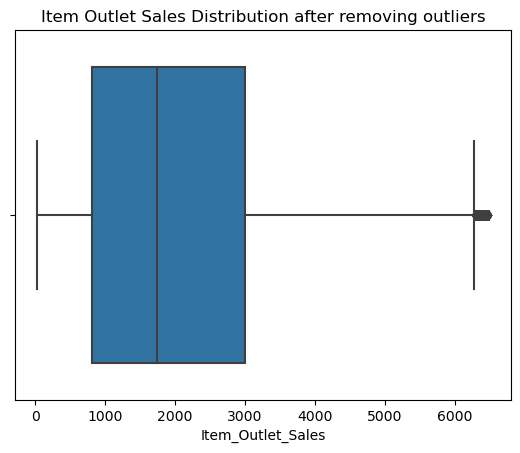

In [25]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')


In [26]:
# change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [27]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non_Consumable,26


In [29]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,train,Food,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train,Non_Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train,Food,4
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,train,Drinks,16


# Data Visualization

## 1)Univariate Plots

##### Lets look at the countplots for categorical data

In [30]:
# Categorical Data
cat_data=[column for column in data if data[column].dtypes==object and column!='source']
cat_data

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [31]:
#for i in cat_data.columns:
       # plt.figure(figsize=[15,7],)
       # print("Countplot for :",i)
       # sns.countplot(data=data,x=i)
       # plt.xlabel(i,fontsize=15)
       # plt.show()
       # print('\n')

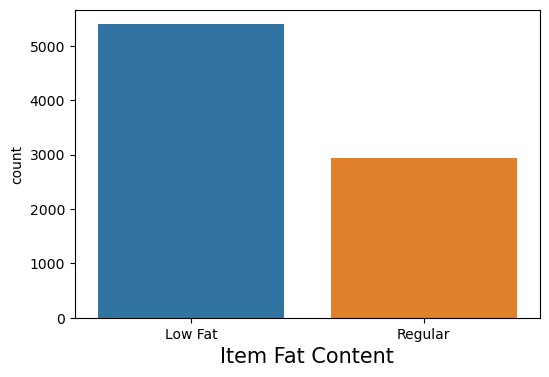

In [32]:
# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

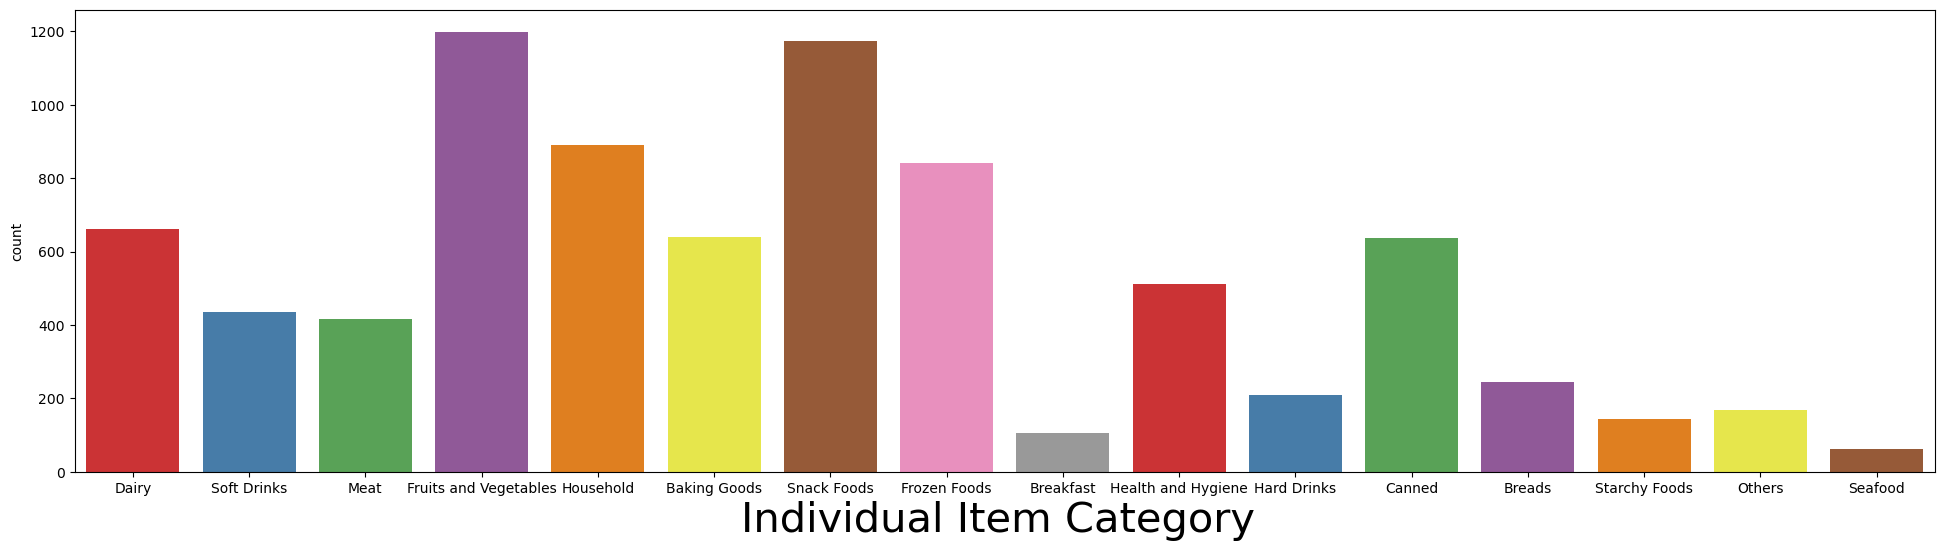

In [33]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

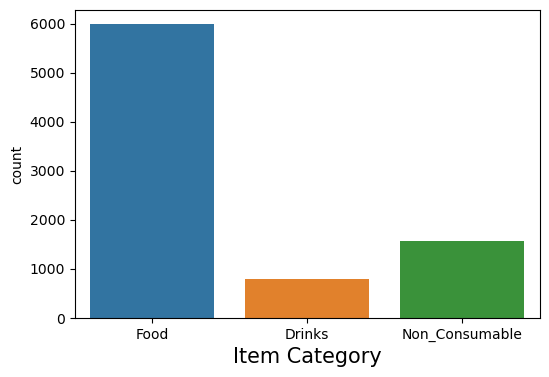

In [34]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

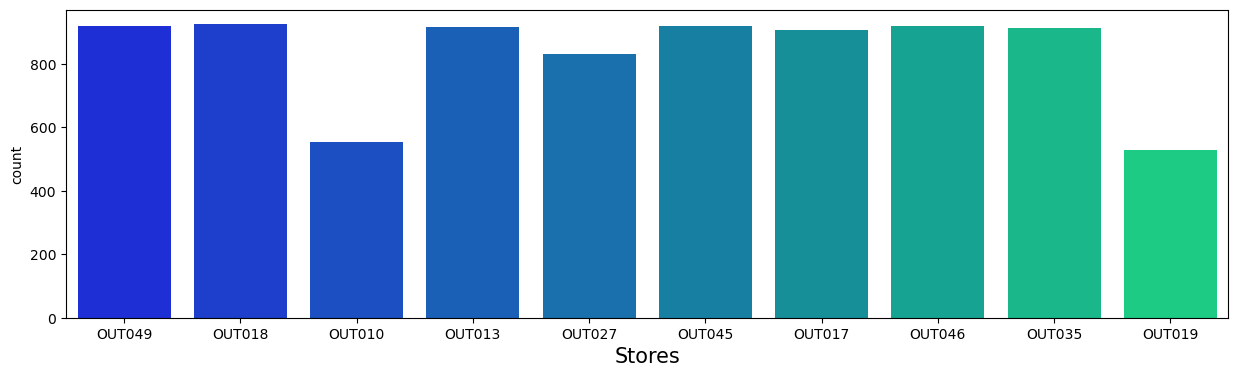

In [35]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()


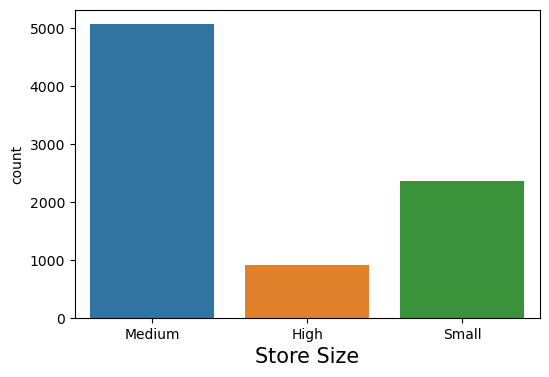

In [36]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

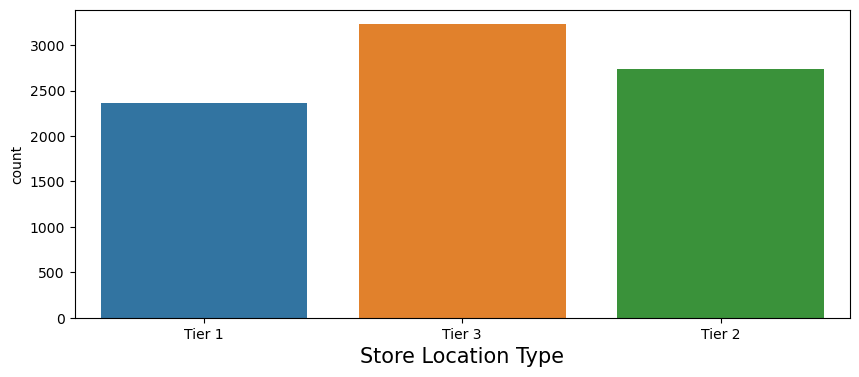

In [37]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

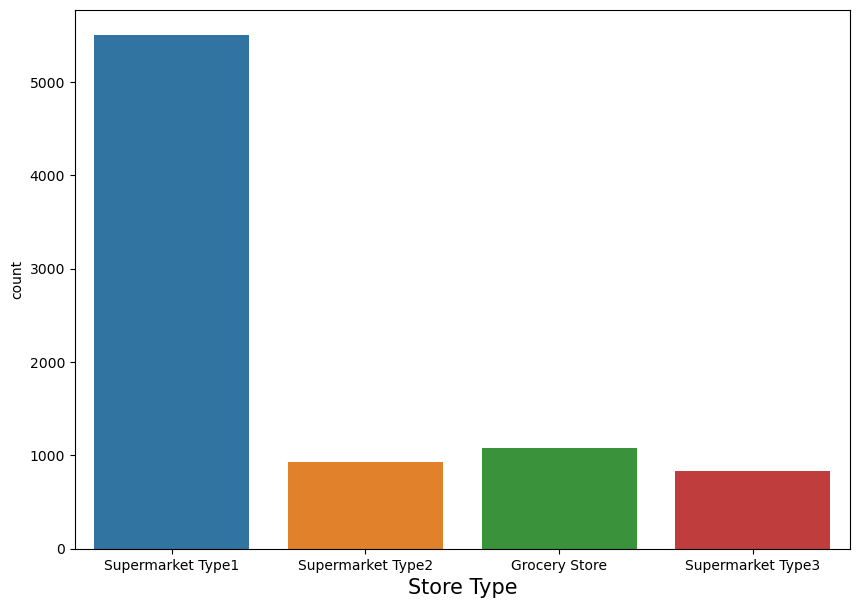

In [38]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

## Realizations

#### 1) Item Fat Content : Most items are sold those who contain Low Fat
#### 2) Item Type: Distinctly fruits and veg,food snacks are popular.
#### 3) Item Type Combined:Most Sold Item cateogory is food.
#### 4) Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
#### 5) Outlet Size: Bigmart Stores are mostly in medium size in this data.
#### 6)Outlet Location Type: Most comon type of location is Tier3.
#### 7)Outlet Type: SuperMarket Type 1 store contribute majority sales in Bigmart Store.

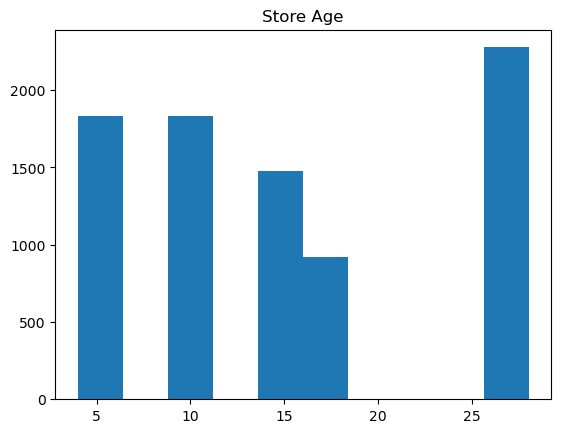

In [39]:
# For Numerical data
# Histplot for outlet_age
plt.hist(x=data['Oultet_Age'])
plt.title('Store Age')
plt.show()

## Realization

#### 1) Outlet Age : Most common outlets are 35 years old.

## Bivariate Plots For Numeric

### Lets check following relationships
#### Sales per Item_MRP
#### Sales per Item_Visibility
#### Sales per Item_Weight

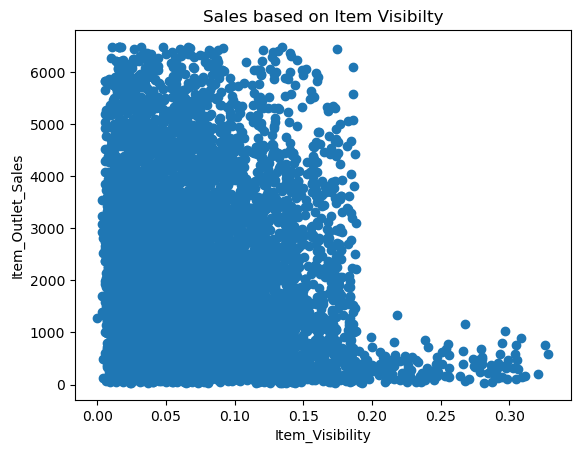

In [40]:
# Scatterplot for Sales per Item_Visibility
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

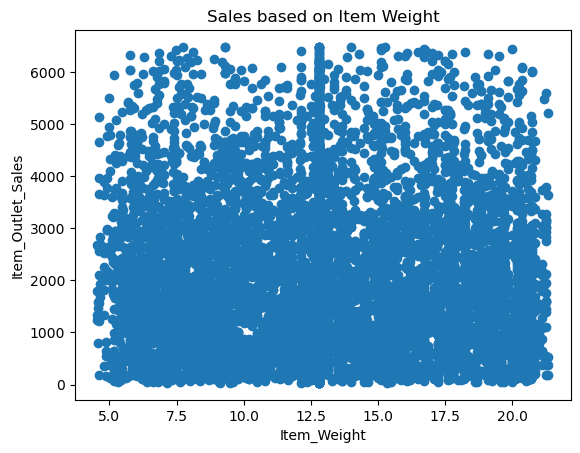

In [41]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

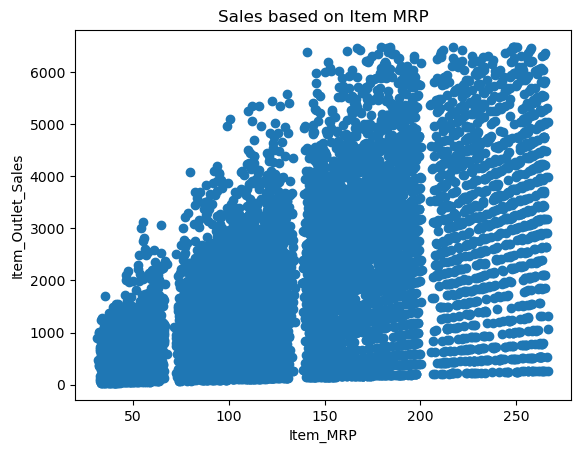

In [42]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Realizations
#### Item_Visibility: Looks like it has negative correlation with sales.
#### Item_Weight: There is no particular pattern between them.
#### Item_MRP: There is slightly positive correlation with sales .Items with high MRP the better is sales.

## Bivariate Plots For Categorical

### Let's check following relationships.

#### Sales per Item_Type_Combined
#### Sales per Outlet_Identifier
#### Sales per Outlet_Type
#### Sales per Outlet_Size
#### Sales per Outlet_Location_Type

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non_Consumable,26


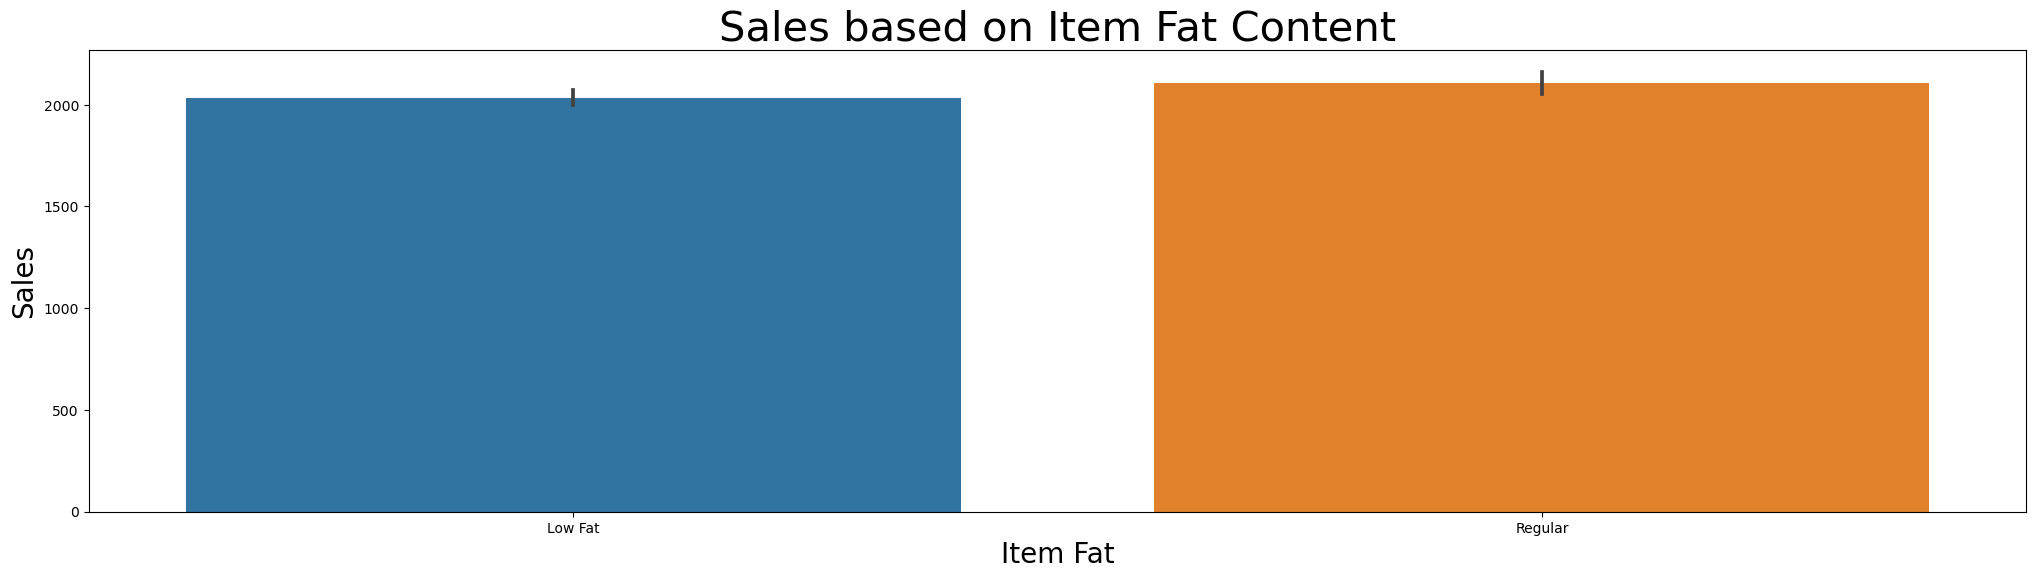

In [44]:
# BarPlot for Sales per Item_Fat_Content
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Sales based on Item Fat Content', fontsize=30)
plt.xlabel('Item Fat', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

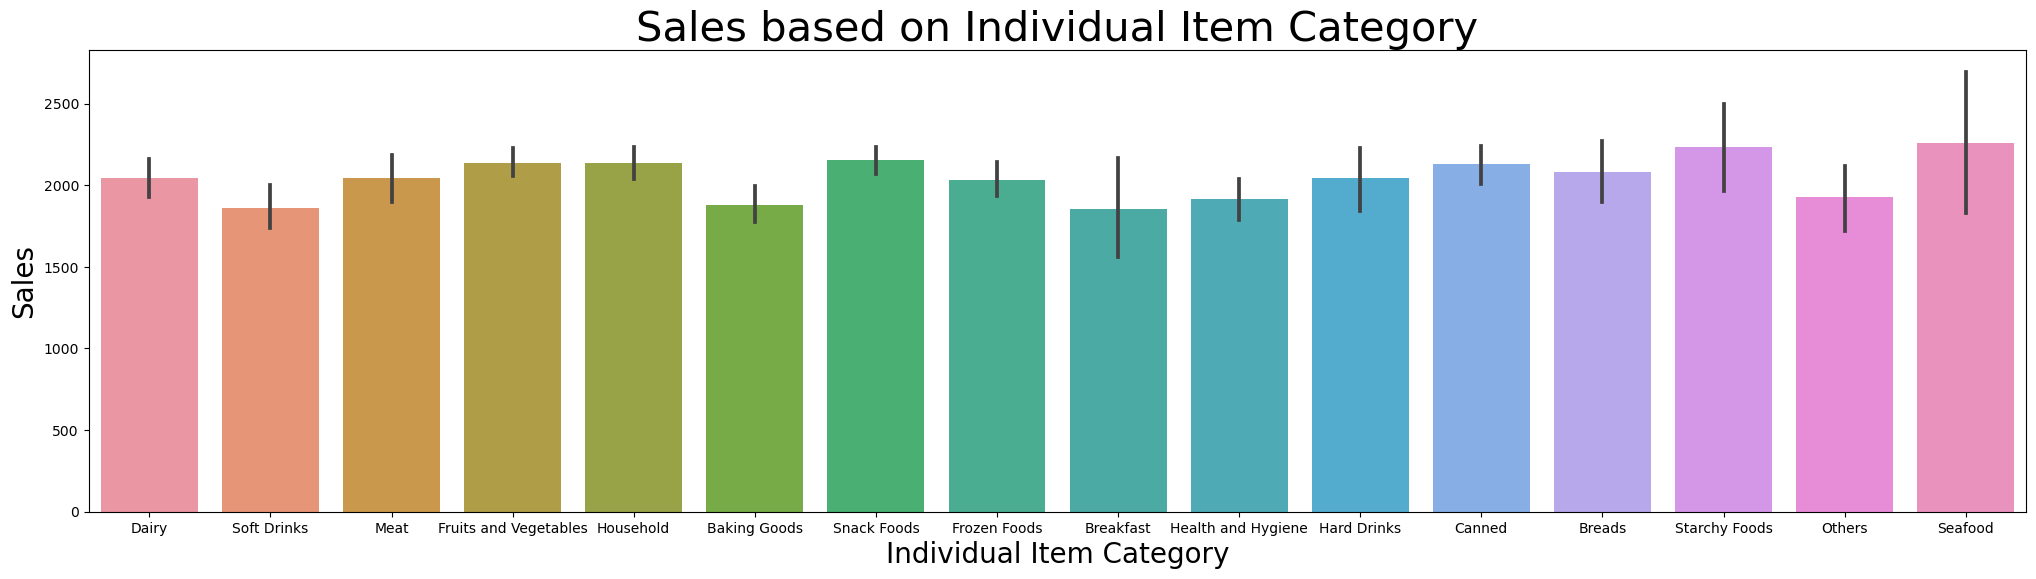

In [45]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

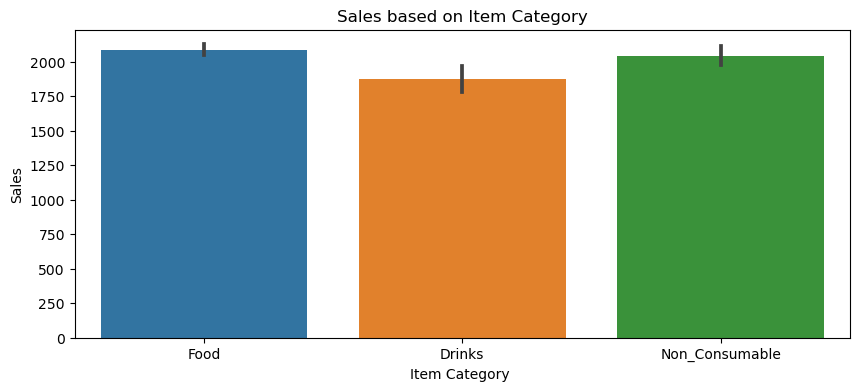

In [46]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.show()

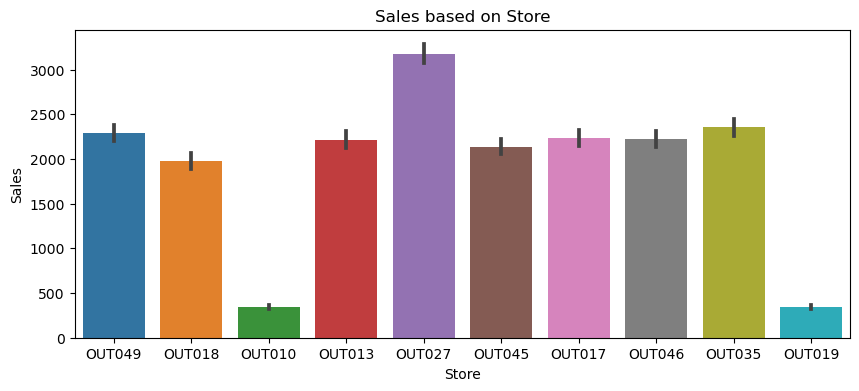

In [47]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

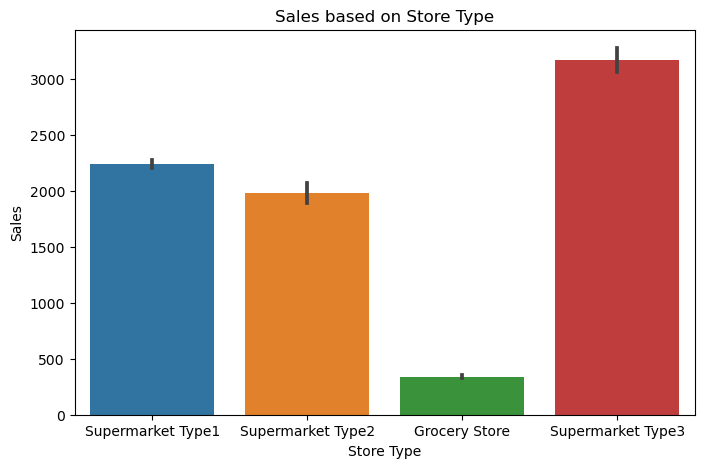

In [48]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

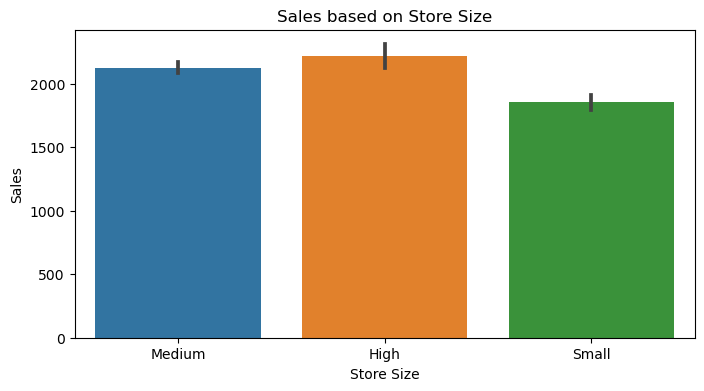

In [49]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()

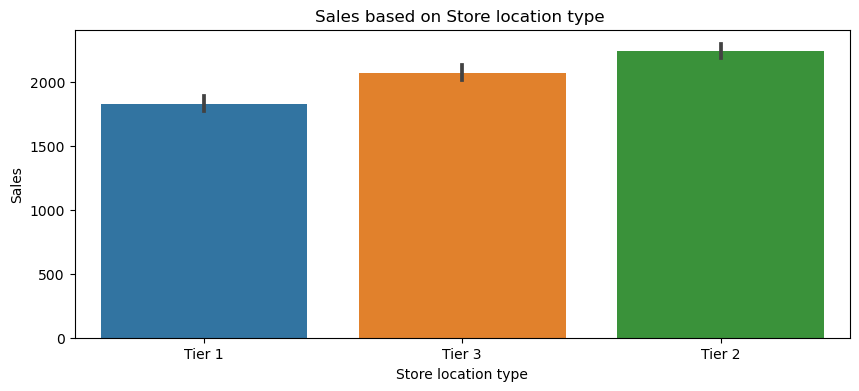

In [50]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

## Realization

#### Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
#### Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
#### Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
#### Outlet_Size: Sells are mostly even in Medium and High size Stores.
#### Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.

# Correlation Matrix

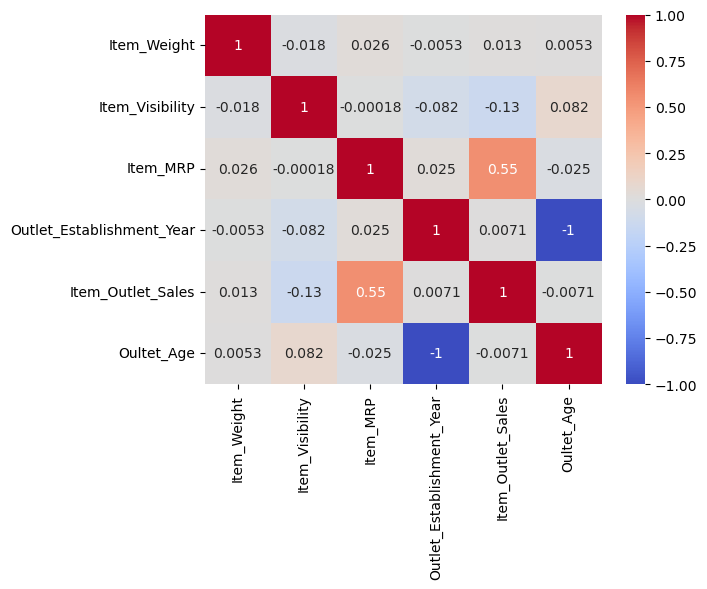

In [51]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.show()

### Realization

#### 1) Item_Outlet_Sales is highly correlated with Item_MRP
#### 2) Outlet_Age and Item_Visibility are negativaly correlated we need to drop them

# Feature Engineering

In [52]:
# The main feature engineering techniques are :
      # 1) Categorical encoding
      # 2) variable transformation
      # 3) outlier engineering
      # 4) Date and time engineering
        


In [53]:
# Label encoding for ordinal data
le=LabelEncoder()
ordinal_data=['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size','Outlet_Identifier']
for i in ordinal_data:
    data[i]=le.fit_transform(data[i])
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,1,1987,0,2,1,994.7052,train,Non_Consumable,26


In [54]:
# One Hot Encoding for nominal data
nominal_data=['Item_Type_Combined']
data_dummy=pd.get_dummies(data['Item_Type_Combined'],drop_first=True)
data_new=pd.concat([data,data_dummy],axis=1)
data_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Food,Non_Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,Food,14,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,Drinks,4,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,Food,14,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,Food,15,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,1,1987,0,2,1,994.7052,train,Non_Consumable,26,0,1


In [55]:
# Drop irrlevent Columns
data_new = data_new.drop(['Item_Identifier','Item_Visibility','Item_Type',
                          'Outlet_Establishment_Year','Item_Type_Combined','Oultet_Age'
                     ], axis=1)
data_new.tail()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Food,Non_Consumable
8518,6.865,0,214.5218,1,0,2,1,2778.3834,train,1,0
8519,8.380,1,108.1570,7,1,1,1,549.2850,train,1,0
8520,10.600,0,85.1224,6,2,1,1,1193.1136,train,0,1
8521,7.210,1,103.1332,3,1,2,2,1845.5976,train,1,0
8522,14.800,0,75.4670,8,2,0,1,765.6700,train,0,0


In [56]:
# Divide Data into train and test
train = data_new.loc[data_new['source']=="train"]
test = data_new.loc[data_new['source']=="test"]

In [57]:
train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)
test.tail()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Food,Non_Consumable


In [58]:
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8337 non-null   float64
 1   Item_Fat_Content      8337 non-null   int32  
 2   Item_MRP              8337 non-null   float64
 3   Outlet_Identifier     8337 non-null   int32  
 4   Outlet_Size           8337 non-null   int32  
 5   Outlet_Location_Type  8337 non-null   int32  
 6   Outlet_Type           8337 non-null   int32  
 7   Item_Outlet_Sales     8337 non-null   float64
 8   Food                  8337 non-null   uint8  
 9   Non_Consumable        8337 non-null   uint8  
dtypes: float64(3), int32(5), uint8(2)
memory usage: 439.6 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Food,Non_Consumable
0,9.30,0,249.8092,9,1,0,1,3735.1380,1,0
1,5.92,1,48.2692,3,1,2,2,443.4228,0,0
2,17.50,0,141.6180,9,1,0,1,2097.2700,1,0
3,19.20,1,182.0950,0,1,2,0,732.3800,1,0
4,8.93,0,53.8614,1,0,2,1,994.7052,0,1


# Machine Learning Model

In [59]:
# Splitting our data into train and test file
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
X_train_std= sc.fit_transform(X_train)
X_train_std

array([[-1.49948233, -0.73473066,  2.05183358, ..., -1.51235419,
         0.63398264, -0.48476799],
       [-0.28611651, -0.73473066,  0.79957623, ..., -0.22226848,
         0.63398264, -0.48476799],
       [ 1.84341655, -0.73473066, -0.51763683, ..., -0.22226848,
         0.63398264, -0.48476799],
       ...,
       [-1.23387574,  1.36104298,  0.52529781, ..., -0.22226848,
         0.63398264, -0.48476799],
       [-0.01867191, -0.73473066, -0.42462799, ...,  2.35790295,
        -1.57733025, -0.48476799],
       [-1.06772536,  1.36104298,  0.62373723, ..., -0.22226848,
         0.63398264, -0.48476799]])

In [62]:
X_test_std= sc.transform(X_test)
X_test_std

array([[-0.01867191,  1.36104298,  0.88719674, ...,  2.35790295,
         0.63398264, -0.48476799],
       [ 0.98926318,  1.36104298,  0.04007173, ..., -0.22226848,
         0.63398264, -0.48476799],
       [ 1.2232778 , -0.73473066,  0.32354412, ...,  1.06781724,
         0.63398264, -0.48476799],
       ...,
       [-0.01867191,  1.36104298, -0.51763683, ..., -1.51235419,
         0.63398264, -0.48476799],
       [-1.4749108 , -0.73473066,  1.96147665, ..., -0.22226848,
        -1.57733025, -0.48476799],
       [-0.01867191,  1.36104298, -1.2750029 , ...,  2.35790295,
         0.63398264, -0.48476799]])

In [63]:
y_train

6670     264.9884
2257    1304.9680
2991    1693.7952
1357    2428.8384
4367    5201.2296
          ...    
5869    2994.7684
5310     115.1834
5516    3238.4512
884     2942.8360
7433    3896.2616
Name: Item_Outlet_Sales, Length: 6669, dtype: float64

In [64]:
y_test

3552    5195.2374
2360    1404.8380
8159    1571.2880
958     1973.4312
5483     524.6504
          ...    
4925      47.2718
5058    4504.8028
1131     211.7244
565     2863.6058
2968    2143.8760
Name: Item_Outlet_Sales, Length: 1668, dtype: float64

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

## Linear Regression

In [116]:
# Model
model_LR=LinearRegression()

In [117]:
# Fit
model_LR.fit(X_train_std,y_train)

LinearRegression()

In [118]:
y_predict=model_LR.predict(X_test_std)

In [119]:
LR_Score=r2_score(y_test,y_predict)

In [120]:
print('R square value is :',r2_score(y_test,y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,y_predict)))

R square value is : 0.4886122642394698
Mean Absolute Error is : 832.0389451008886
Root Mean Squared Error is: 1072.7735530807417


In [121]:
rfe_LR=RFE(model_LR)
rfe=rfe_LR.fit(X_train_std,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True False False]
[4 3 1 1 1 2 1 5 6]


In [122]:
print(len(X_train.columns))
print(X_train.columns)
col=X_train.columns[rfe.support_]
print("\nFeatures which impact on Sales using Linear Regression :",'\n',col)

9
Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Food',
       'Non_Consumable'],
      dtype='object')

Features which impact on Sales using Linear Regression : 
 Index(['Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'], dtype='object')


In [123]:
R_coef = pd.Series(model_LR.coef_, X_train.columns).sort_values(ascending=False)
print(R_coef)

Item_MRP                847.953962
Outlet_Type             605.301704
Outlet_Identifier       207.436195
Item_Fat_Content         20.991206
Food                      7.743725
Non_Consumable            3.670435
Item_Weight              -9.214245
Outlet_Location_Type   -153.615411
Outlet_Size            -206.480295
dtype: float64


<Axes: >

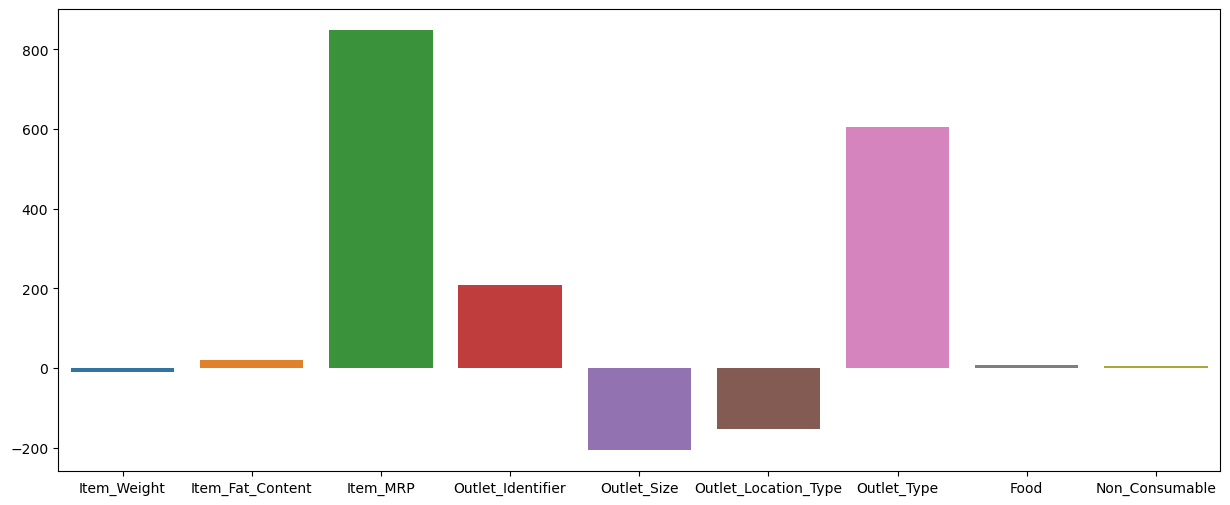

In [124]:
plt.figure(figsize=(15,6))
sns.barplot(y=model_LR.coef_, x=X_train.columns)

## 2) LASSO

In [125]:
model_LS=Lasso(alpha=0.05)

In [126]:
model_LS.fit(X_train_std,y_train)

Lasso(alpha=0.05)

In [127]:
y_predict=model_LS.predict(X_test_std)

In [128]:
LS_Score=r2_score(y_test,y_predict)

In [129]:
print('R square value is :',r2_score(y_test,y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,y_predict)))

R square value is : 0.4886095304884126
Mean Absolute Error is : 832.0441530994003
Root Mean Squared Error is: 1072.7764204665925


In [130]:
rfe_Lasso=RFE(model_LS)
rfe=rfe_Lasso.fit(X_train_std,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True False False]
[4 3 1 1 1 2 1 5 6]


In [131]:
print(len(X_train.columns))
print(X_train.columns)
col=X_train.columns[rfe.support_]
print("\nFeatures which impact on Sales using Lasso Regression :",'\n',col)

9
Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Food',
       'Non_Consumable'],
      dtype='object')

Features which impact on Sales using Lasso Regression : 
 Index(['Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'], dtype='object')


In [132]:
R_coef = pd.Series(model_LS.coef_, X_train.columns).sort_values(ascending=False)
print(R_coef)

Item_MRP                847.906320
Outlet_Type             605.143100
Outlet_Identifier       207.536343
Item_Fat_Content         20.949669
Food                      7.550748
Non_Consumable            3.454975
Item_Weight              -9.154105
Outlet_Location_Type   -153.335084
Outlet_Size            -206.338653
dtype: float64


<Axes: >

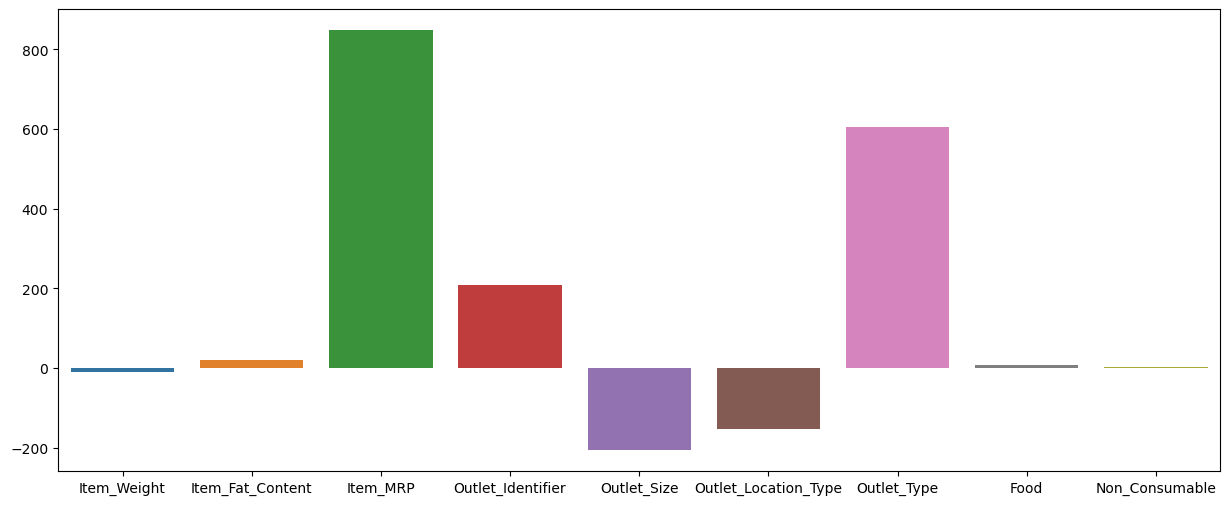

In [133]:
plt.figure(figsize=(15,6))
sns.barplot(y=model_LS.coef_, x=X_train.columns)

### 2) Ridge Regression

In [134]:
model_Ridge=Ridge()

In [135]:
model_Ridge.fit(X_train_std,y_train)

Ridge()

In [136]:
y_predict=model_Ridge.predict(X_test_std)

In [137]:
Ridge_Score=r2_score(y_test,y_predict)

In [138]:
print('R square value is :',r2_score(y_test,y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,y_predict)))

R square value is : 0.4886124984020844
Mean Absolute Error is : 832.0404106404387
Root Mean Squared Error is: 1072.7733074711277


In [139]:
rfe_Ridge=RFE(model_Ridge)
rfe=rfe_Ridge.fit(X_train_std,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True False False]
[4 3 1 1 1 2 1 5 6]


In [140]:
print(len(X_train.columns))
print(X_train.columns)
col=X_train.columns[rfe.support_]
print("\nFeatures which impact on Sales using Ridge Regression :",'\n',col)

9
Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Food',
       'Non_Consumable'],
      dtype='object')

Features which impact on Sales using Ridge Regression : 
 Index(['Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'], dtype='object')


In [141]:
R_coef = pd.Series(model_Ridge.coef_, X_train.columns).sort_values(ascending=False)
print(R_coef)

Item_MRP                847.821094
Outlet_Type             605.072364
Outlet_Identifier       207.600471
Item_Fat_Content         20.989715
Food                      7.756354
Non_Consumable            3.678260
Item_Weight              -9.208195
Outlet_Location_Type   -153.318824
Outlet_Size            -206.394939
dtype: float64


<Axes: >

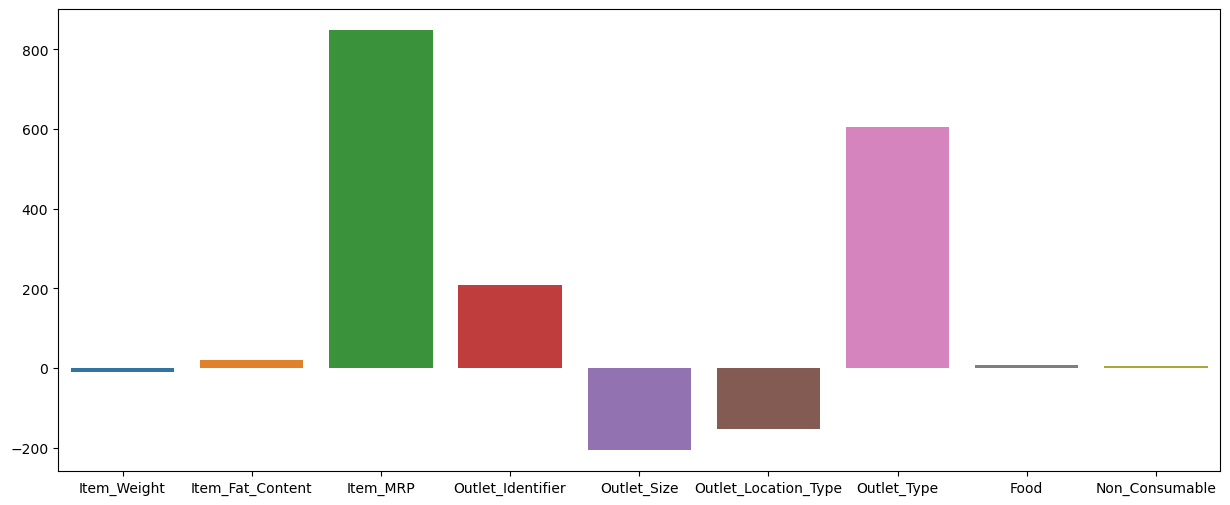

In [142]:
plt.figure(figsize=(15,6))
sns.barplot(y=model_Ridge.coef_, x=X_train.columns)

## Random Forest

In [143]:
model_RF=RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

In [144]:
model_RF.fit(X_train_std,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4, random_state=101)

In [145]:
y_predict=model_RF.predict(X_test_std)

In [146]:
RF_Score=r2_score(y_test,y_predict)

In [147]:
print('R square value is :',r2_score(y_test,y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,y_predict)))

R square value is : 0.5714361412150807
Mean Absolute Error is : 722.0932027248864
Root Mean Squared Error is: 982.0660009039374


In [148]:
rfe_RF=RFE(model_RF)
rfe=rfe_RF.fit(X_train_std,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False False  True False False]
[1 3 1 1 4 2 1 5 6]


In [149]:
print(len(X_train.columns))
print(X_train.columns)
col=X_train.columns[rfe.support_]
print("\nFeatures which impact on Sales using Random Forest Regression :",'\n',col)

9
Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Food',
       'Non_Consumable'],
      dtype='object')

Features which impact on Sales using Random Forest Regression : 
 Index(['Item_Weight', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


In [150]:
R_coef = pd.Series(model_RF.feature_importances_, X_train.columns).sort_values(ascending=False)
print(R_coef)

Item_MRP                0.541715
Outlet_Type             0.447792
Item_Weight             0.005010
Outlet_Identifier       0.003628
Outlet_Location_Type    0.001075
Outlet_Size             0.000297
Item_Fat_Content        0.000285
Food                    0.000173
Non_Consumable          0.000025
dtype: float64


<Axes: >

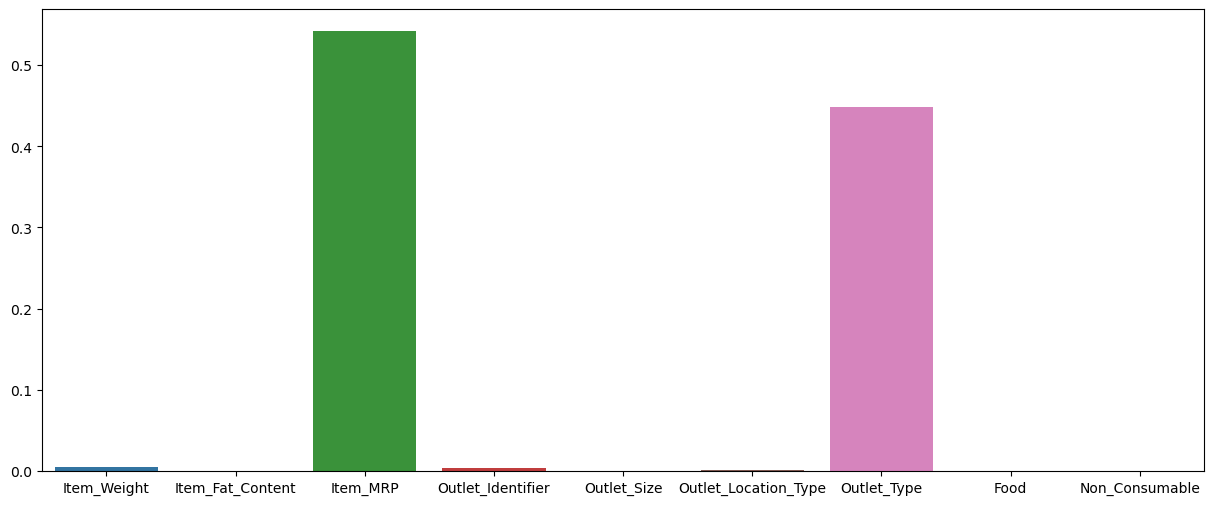

In [151]:
plt.figure(figsize=(15,6))
sns.barplot(y=model_RF.feature_importances_, x=X_train.columns)

## XG Boost Regressor

In [152]:
!pip install xgboost

In [153]:
from xgboost import XGBRegressor
model_XB=XGBRegressor()

In [154]:
model_XB.fit(X_train_std,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [155]:
y_predict=model_XB.predict(X_test_std)

In [156]:
XB_Score=r2_score(y_test,y_predict)

In [157]:
print('R square value is :',r2_score(y_test,y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error is:',np.sqrt(mean_squared_error(y_test,y_predict)))

R square value is : 0.5097699005070335
Mean Absolute Error is : 766.6856326495912
Root Mean Squared Error is: 1050.347220662595


In [158]:
rfe_XB=RFE(model_XB)
rfe=rfe_XB.fit(X_train_std,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True  True  True]
[5 6 1 3 4 2 1 1 1]


In [159]:
print(len(X_train.columns))
print(X_train.columns)
col=X_train.columns[rfe.support_]
print("\nFeatures which impact on Sales using XGBoost Regression :",'\n',col)

9
Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Food',
       'Non_Consumable'],
      dtype='object')

Features which impact on Sales using XGBoost Regression : 
 Index(['Item_MRP', 'Outlet_Type', 'Food', 'Non_Consumable'], dtype='object')


In [160]:
R_coef = pd.Series(model_XB.feature_importances_, X_train.columns).sort_values(ascending=False)
print(R_coef)

Outlet_Type             0.765830
Item_MRP                0.083778
Outlet_Location_Type    0.031296
Food                    0.023903
Non_Consumable          0.021646
Outlet_Size             0.020210
Outlet_Identifier       0.020161
Item_Weight             0.017434
Item_Fat_Content        0.015743
dtype: float32


<Axes: >

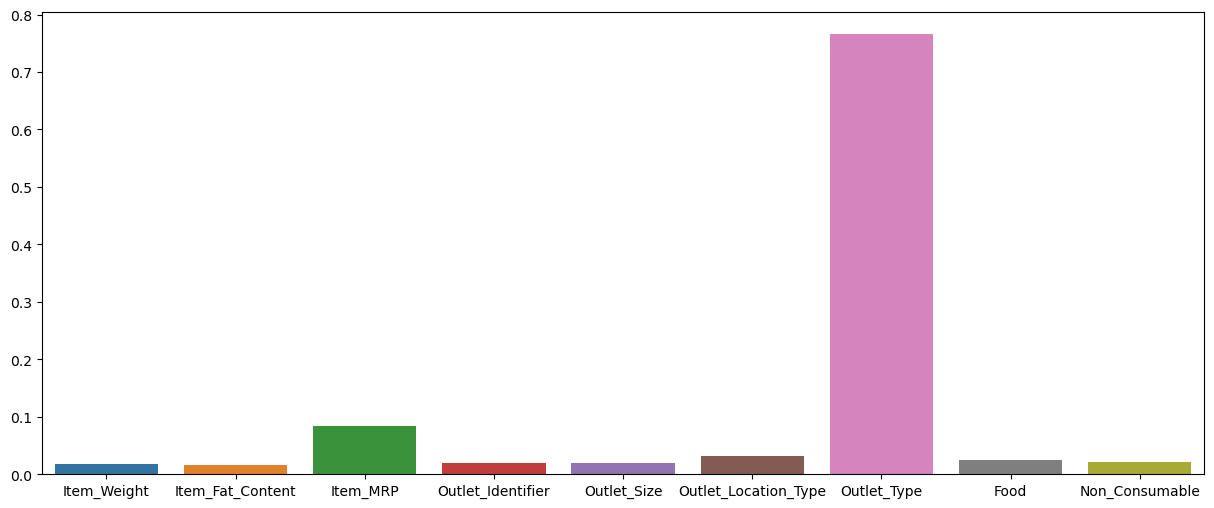

In [161]:
plt.figure(figsize=(15,6))
sns.barplot(y=model_XB.feature_importances_, x=X_train.columns)

# Summary

In [163]:
model_Result=pd.DataFrame({'model_Name':['Linear Regression','LASSO Regression','Ridge Regression','Random Forest','XGBoost'],
                           'values':(LR_Score,LS_Score,Ridge_Score,RF_Score,XB_Score)})
model_Result

,model_Name,values
0,Linear Regression,0.488612
1,LASSO Regression,0.488610
2,Ridge Regression,0.488612
3,Random Forest,0.571436
4,XGBoost,0.509770


### Random Forest Regression model better fit for given dataset rather than other models
### Item_MRP and Outlet_Type done more effect on bigmart sales.